In [31]:
import numpy as np
import pandas as pd
import math

from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_excel('130N_Cycles_1-47.xlsx',sheetname='Specimen_RawData_1',skiprows=[0])
df.columns = ['time','load']

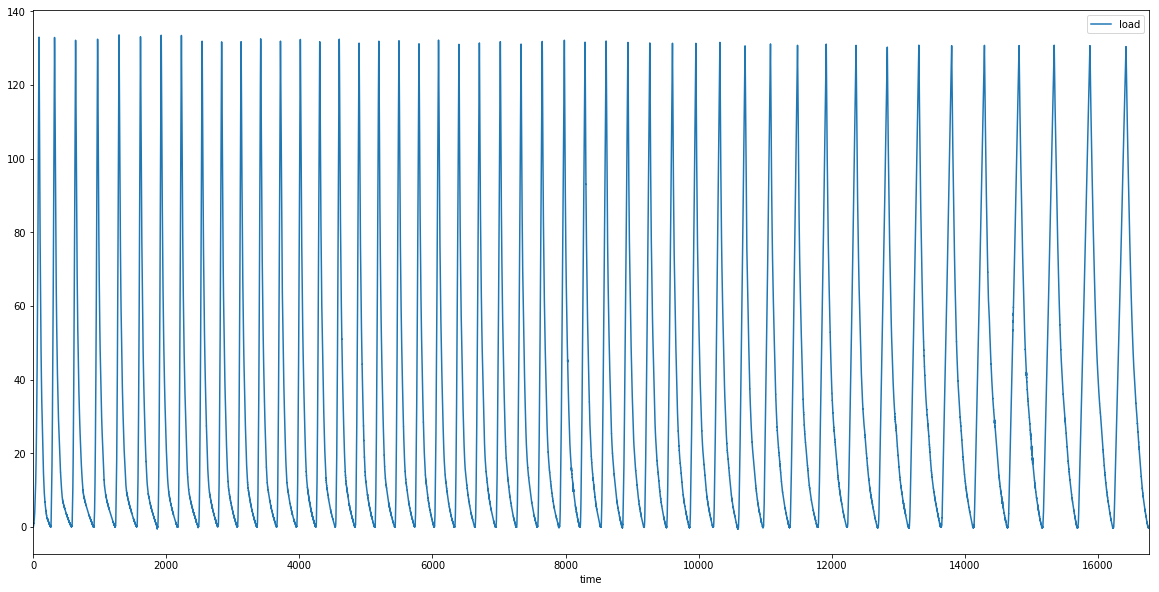

In [33]:
df.plot(y='load',x='time',figsize=(20,10))

In [34]:
df_train = df[:40000]

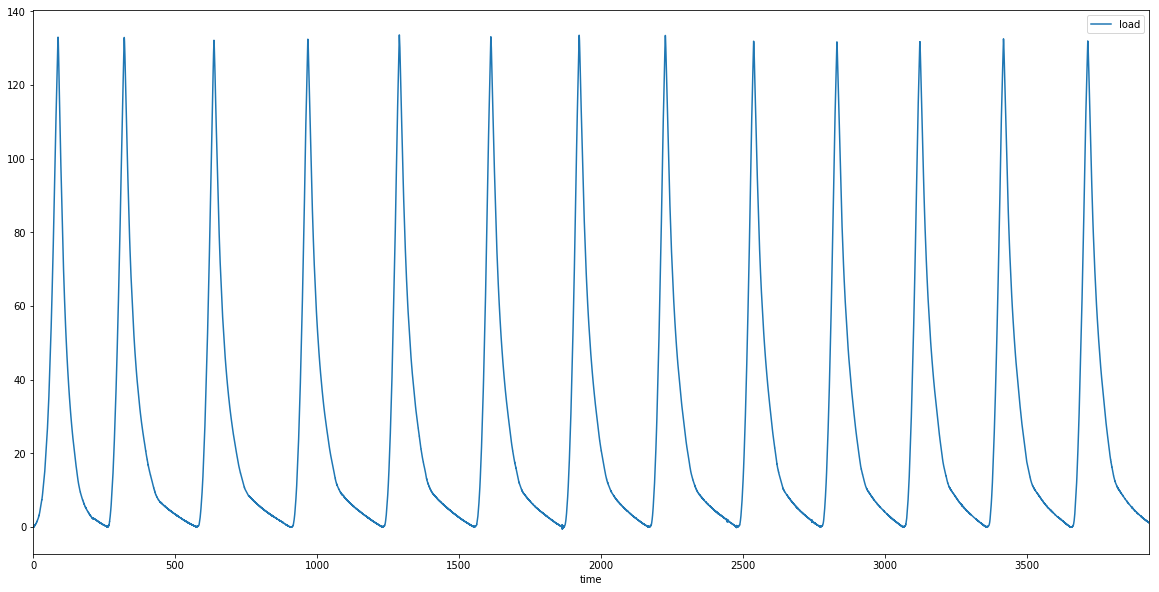

In [35]:
df_train.plot(y='load',x='time',figsize=(20,10))

In [36]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX),np.array(dataY)

In [37]:
np.random.seed(7)

In [38]:
df_train.drop('time',inplace=True,axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
dataset_train = df_train.values.astype('float32')

In [40]:
print(dataset_train)
print(dataset_train.max())
print(dataset_train.min())

[[ 0.06729   ]
 [ 0.07128   ]
 [ 0.05453   ]
 ..., 
 [ 1.06121004]
 [ 1.04658997]
 [ 1.08901   ]]
133.595
-0.6184


In [41]:
# scaler = MinMaxScaler(feature_range=(0,1))
# dataset_train = scaler.fit_transform(dataset_train)

In [42]:
print(dataset_train)
print(dataset_train.max())
print(dataset_train.min())

[[ 0.06729   ]
 [ 0.07128   ]
 [ 0.05453   ]
 ..., 
 [ 1.06121004]
 [ 1.04658997]
 [ 1.08901   ]]
133.595
-0.6184


In [43]:
print(dataset_train.shape)

(40000, 1)


In [44]:
look_back = 1
trainX,trainY = create_dataset(dataset_train,look_back)

In [45]:
print(trainX.shape)
print(trainY.shape)
trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
print(trainX.shape)

(39998, 1)
(39998,)
(39998, 1, 1)


In [46]:
model = Sequential()
model.add(LSTM(16,input_shape=(1,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [47]:
model.fit(trainX,trainY,epochs = 50, batch_size=32,verbose=2)

Epoch 1/50
1s - loss: 1493.6388
Epoch 2/50
1s - loss: 1019.2796
Epoch 3/50
1s - loss: 714.1519
Epoch 4/50
1s - loss: 494.9764
Epoch 5/50
1s - loss: 335.7403
Epoch 6/50
1s - loss: 220.3632
Epoch 7/50
1s - loss: 138.5954
Epoch 8/50
1s - loss: 82.5906
Epoch 9/50
1s - loss: 46.1302
Epoch 10/50
1s - loss: 23.8688
Epoch 11/50
1s - loss: 11.2418
Epoch 12/50
1s - loss: 4.7635
Epoch 13/50
1s - loss: 1.8210
Epoch 14/50
1s - loss: 0.6539
Epoch 15/50
1s - loss: 0.2256
Epoch 16/50
1s - loss: 0.1130
Epoch 17/50
1s - loss: 0.0650
Epoch 18/50
1s - loss: 0.0732
Epoch 19/50
1s - loss: 0.0550
Epoch 20/50
1s - loss: 0.0723
Epoch 21/50
1s - loss: 0.0567
Epoch 22/50
1s - loss: 0.0554
Epoch 23/50
1s - loss: 0.0651
Epoch 24/50
1s - loss: 0.0634
Epoch 25/50
1s - loss: 0.0600
Epoch 26/50
1s - loss: 0.0702
Epoch 27/50
1s - loss: 0.0589
Epoch 28/50
1s - loss: 0.0659
Epoch 29/50
1s - loss: 0.0643
Epoch 30/50
1s - loss: 0.0703
Epoch 31/50
1s - loss: 0.0671
Epoch 32/50
1s - loss: 0.0531
Epoch 33/50
1s - loss: 0.0563

In [53]:
trainX

array([[[ 0.06729   ]],

       [[ 0.07128   ]],

       [[ 0.05453   ]],

       ..., 
       [[ 1.06879997]],

       [[ 1.07808995]],

       [[ 1.06121004]]], dtype=float32)

In [54]:
trainX[-1]

array([[ 1.06121004]], dtype=float32)

In [55]:
def get_next_prediction(x,scaler,model):
    x_new = x.reshape(x.shape[0],1,x.shape[1])
    y_new = model.predict(x_new)
#     y_new_inv = scaler.inverse_transform(y_new)
    return y_new

In [56]:
l = list()

output_new = trainX[-1]
input_new = trainX[-1]

for i in range(1000):
    output_new = get_next_prediction(input_new,scaler,model)
    l.append(output_new)
    input_new = output_new

# l_inv = list()
# for item in l:
#     l_inv.append(scaler.inverse_transform(item))
# input_new = input_new.reshape(input_new.shape[0],1,input_new.shape[1])

In [57]:
l_inv_reshaped = list()
for item in l_inv:
    l_inv_reshaped.append(item.reshape(item.shape[0],))

In [58]:
l_inv_reshaped

[array([ 136.51216125], dtype=float32),
 array([ 131.15156555], dtype=float32),
 array([ 125.73427582], dtype=float32),
 array([ 120.26822662], dtype=float32),
 array([ 114.76274872], dtype=float32),
 array([ 109.22898102], dtype=float32),
 array([ 103.68011475], dtype=float32),
 array([ 98.1311264], dtype=float32),
 array([ 92.59915161], dtype=float32),
 array([ 87.10224915], dtype=float32),
 array([ 81.66026306], dtype=float32),
 array([ 76.29391479], dtype=float32),
 array([ 71.02433777], dtype=float32),
 array([ 65.87328339], dtype=float32),
 array([ 60.86135864], dtype=float32),
 array([ 56.00904465], dtype=float32),
 array([ 51.33477402], dtype=float32),
 array([ 46.85530853], dtype=float32),
 array([ 42.58448029], dtype=float32),
 array([ 38.53392792], dtype=float32),
 array([ 34.71197891], dtype=float32),
 array([ 31.12413216], dtype=float32),
 array([ 27.77256584], dtype=float32),
 array([ 24.65638542], dtype=float32),
 array([ 21.77264214], dtype=float32),
 array([ 19.1153259

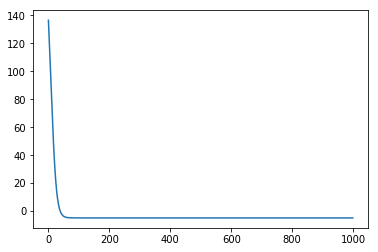

In [59]:
plt.plot(range(len(l_inv_reshaped)),l_inv_reshaped)
plt.show()

In [70]:

# output_new = model.predict(input_new)

In [73]:
# print(output_new)
# output_new_inv = scaler.inverse_transform(output_new)
# print(output_new_inv)

[[ 0.01181847]]
[[ 0.96779406]]


In [90]:
print(df[df.index==40000])
print(df[df.index==39999])
print(df[df.index==39998])
print(df[df.index==39997])
print(scaler.inverse_transform(trainX[-1]))

             time     load
40000  3932.09975  1.04395
         time     load
39999  3932.0  1.08901
         time     load
39998  3931.9  1.04659
             time     load
39997  3931.79975  1.06121
[[ 1.06121004]]


In [87]:
print(df[df.index==0])
print(scaler.inverse_transform(trainX[0]))

   time     load
0   0.0  0.06729
[[ 0.06729002]]


In [88]:
trainX.shape

(39998, 1, 1)